[*********************100%***********************]  1 of 1 completed


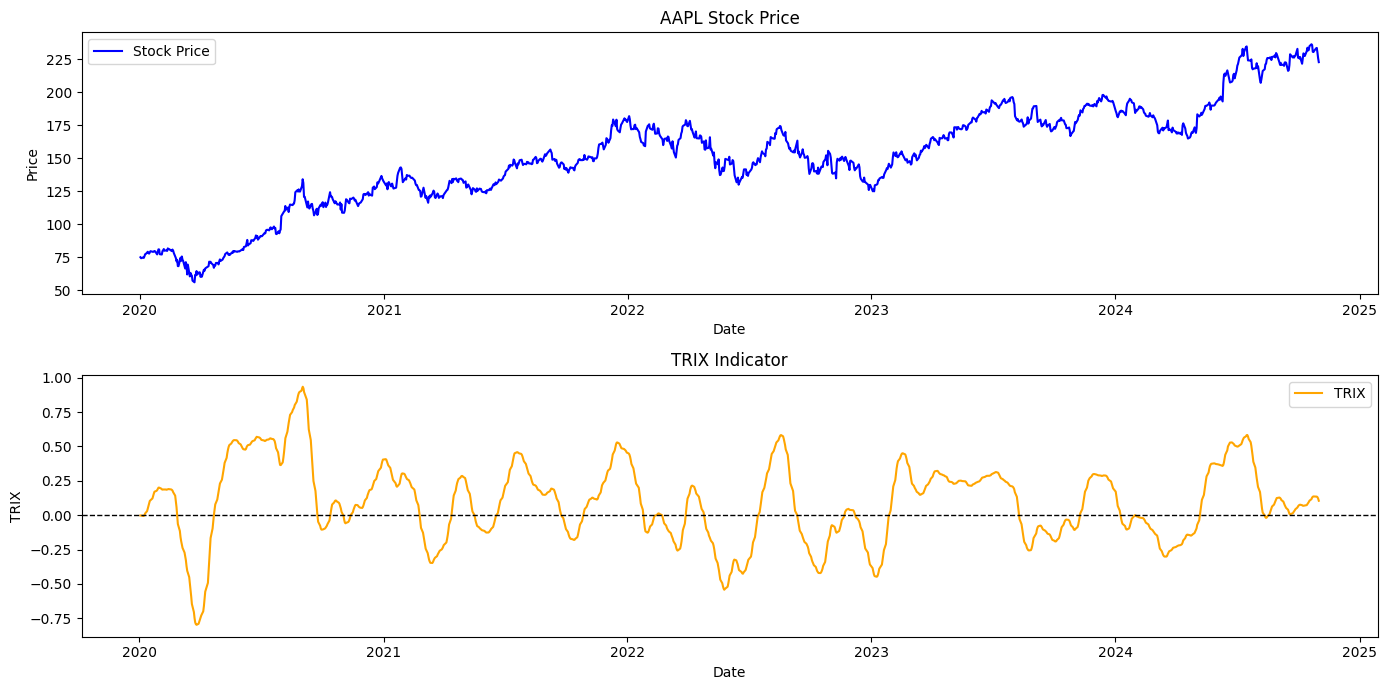

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

def calculate_ema(prices, n):
    """Calculate Exponential Moving Average (EMA)."""
    return prices.ewm(span=n, adjust=False).mean()

def calculate_trix(prices, n=10):
    """Calculate Trix indicator."""
    ema1 = calculate_ema(prices, n)
    ema2 = calculate_ema(ema1, n)
    ema3 = calculate_ema(ema2, n)


    trix = ((ema3 - ema3.shift(1)) / ema3.shift(1)) * 100
    return trix


ticker = 'AAPL'
start_date = '2020-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

data = yf.download(ticker, start=start_date, end=end_date)

data.dropna(inplace=True)

data['TRIX'] = calculate_trix(data['Close'], n=15)
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Stock Price', color='blue')
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(data['TRIX'], label='TRIX', color='orange')
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.title('TRIX Indicator')
plt.xlabel('Date')
plt.ylabel('TRIX')
plt.legend()

plt.tight_layout()
plt.show()


